In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import collections
import random
import numpy as np
import os
import time
import json
from PIL import Image

In [ ]:
pathi = os.path.join('/content/ImageCap', 'images')
pathf= os.path.join('/content/ImageCap', 'annotations')
os.makedirs(pathi)
os.makedirs(pathf)

In [ ]:
!unzip '/content/drive/MyDrive/ImgCaptioning/Images.zip' -d '/content/ImageCap/images'
!unzip '/content/drive/MyDrive/ImgCaptioning/captions.txt.zip' -d '/content/ImageCap/annotations' 

Streaming output truncated to the last 5000 lines.
  inflating: /content/ImageCap/images/2844963839_ff09cdb81f.jpg  
  inflating: /content/ImageCap/images/2845246160_d0d1bbd6f0.jpg  
  inflating: /content/ImageCap/images/2845691057_d4ab89d889.jpg  
  inflating: /content/ImageCap/images/2845845721_d0bc113ff7.jpg  
  inflating: /content/ImageCap/images/2846037553_1a1de50709.jpg  
  inflating: /content/ImageCap/images/2846785268_904c5fcf9f.jpg  
  inflating: /content/ImageCap/images/2846843520_b0e6211478.jpg  
  inflating: /content/ImageCap/images/2847514745_9a35493023.jpg  
  inflating: /content/ImageCap/images/2847615962_c330bded6e.jpg  
  inflating: /content/ImageCap/images/2847859796_4d9cb0d31f.jpg  
  inflating: /content/ImageCap/images/2848266893_9693c66275.jpg  
  inflating: /content/ImageCap/images/2848571082_26454cb981.jpg  
  inflating: /content/ImageCap/images/2848895544_6d06210e9d.jpg  
  inflating: /content/ImageCap/images/2848977044_446a31d86e.jpg  
  inflating: /content/Ima

In [ ]:
import glob
images='/content/ImageCap/images'
all_imgs = glob.glob(images + '/*.jpg',recursive=True)
len(all_imgs)

8091

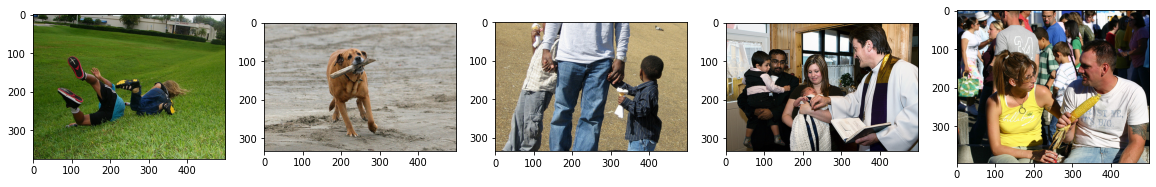

In [ ]:
import imageio
Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
for ax, image in zip(axes, Display_Images):
  ax.imshow(imageio.imread(image), cmap=None)

In [ ]:
text_file = '/content/ImageCap/annotations/captions.txt'
def load_doc(filename):
    open_file = open(text_file, 'r', encoding='latin-1' ) 
    text = open_file.read() 
    open_file.close()
    return text
doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


In [ ]:
# Can be ignored for csv files
import pandas as pd
img_path = '/content/ImageCap/images/'
all_img_id = [] 
all_img_vector = [] 
annotations = [] 

with open('/content/ImageCap/annotations/captions.txt' , 'r') as fo:
  next(fo) 
  for line in fo :
    split_arr = line.split(',')
    all_img_id.append(split_arr[0])
    annotations.append(split_arr[1].rstrip('\n.')) 
    all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,/content/ImageCap/images/1000268201_693b08cb0e...,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,/content/ImageCap/images/1000268201_693b08cb0e...,A girl going into a wooden building
2,1000268201_693b08cb0e.jpg,/content/ImageCap/images/1000268201_693b08cb0e...,A little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e.jpg,/content/ImageCap/images/1000268201_693b08cb0e...,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,/content/ImageCap/images/1000268201_693b08cb0e...,A little girl in a pink dress going into a woo...
...,...,...,...
40450,997722733_0cb5439472.jpg,/content/ImageCap/images/997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,/content/ImageCap/images/997722733_0cb5439472.jpg,A man is rock climbing high in the air
40452,997722733_0cb5439472.jpg,/content/ImageCap/images/997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,/content/ImageCap/images/997722733_0cb5439472.jpg,A rock climber in a red shirt


In [ ]:
from collections import Counter
vocabulary = [word.lower() for line in annotations for word in line.split()]
val_count = Counter(vocabulary) 

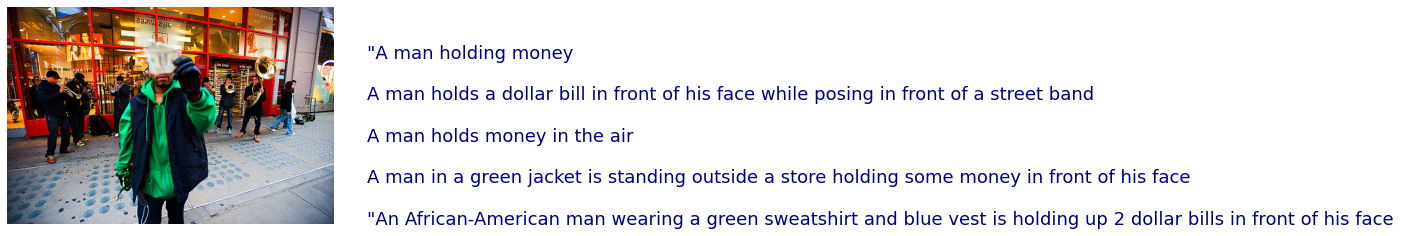

In [ ]:
def caption_with_img_plot(image_id, frame) :
  capt = ("\n" *2).join(frame[frame['ID'] == image_id].Captions.to_list())
  fig, ax = plt.subplots()
  ax.set_axis_off()
  idx = df.ID.to_list().index(image_id)
  im =  Image.open(df.Path.iloc[idx])
  w, h = im.size[0], im.size[-1]
  ax.imshow(im)
  ax.text(w+50, h, capt, fontsize = 18, color = 'navy')
caption_with_img_plot(df.ID.iloc[8049], df)

In [ ]:
import string
#data cleaning
rem_punct = str.maketrans('', '', string.punctuation)
for r in range(len(annotations)) :
  line = annotations[r]
  line = line.split()

  # converting to lowercase
  line = [word.lower() for word in line]

  # remove punctuation from each caption and hanging letters
  line = [word.translate(rem_punct) for word in line]
  line = [word for word in line if len(word) > 1]

  # remove numeric values
  line = [word for word in line if word.isalpha()]

  annotations[r] = ' '.join(line)
  #add the <start> & <end> token to all those captions as well
annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path = all_img_vector
##list contatining captions for an image
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

In [ ]:
# Creating the tokenizer
from keras.preprocessing.text import Tokenizer
top_word_cnt = 5000
tokenizer = Tokenizer(num_words = top_word_cnt+1, filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',
                      lower = True, char_level = False, 
                      oov_token = 'UNK')

In [ ]:
tokenizer.fit_on_texts(annotations)
train_seqs = tokenizer.texts_to_sequences(annotations)
tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [ ]:
tokenizer_top_words = [word for line in annotations for word in line.split() ]
#tokenizer_top_words_count
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)
tokens = tokenizer_top_words_count.most_common(30)
most_common_words_df = pd.DataFrame(tokens, columns = ['Word', 'Count'])


In [ ]:
train_seqs_len = [len(seq) for seq in train_seqs]
longest_word_length = max(train_seqs_len)
cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)
print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 31)


In [ ]:
from sklearn.model_selection import train_test_split

def load_images(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.keras.layers.Resizing(299, 299)(img)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

training_list = sorted(set(all_img_vector))
New_Img = tf.data.Dataset.from_tensor_slices(training_list)
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
New_Img = New_Img.batch(64, drop_remainder=False)

path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, 
                                                                      test_size = 0.2, random_state = 42)

In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [ ]:
# extract features from each image in the dataset
from tqdm import tqdm
img_features = {}
for image, image_path in tqdm(New_Img) :
  batch_features = image_features_extract_model(image)
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
  for batch_feat, path in zip(batch_features_flattened, image_path) :
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()

100%|██████████| 127/127 [00:41<00:00,  3.10it/s]


In [ ]:
def map(image_name, caption):
    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

In [ ]:
BUFFER_SIZE = 1000
BATCH_SIZE = 64
embedding_dim = 256 
units = 512
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE 
test_num_steps = len(path_test) // BATCH_SIZE  
max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

def gen_dataset(img, capt):       
    data = tf.data.Dataset.from_tensor_slices((img, capt))
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)  
     
    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    return data

In [ ]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [ ]:
class Attention(tf.keras.Model):
  def __init__(self, units):
    super(Attention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    
    hidden_with_time_axis = tf.expand_dims(hidden, 1)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))
    score = self.V(attention_hidden_layer)
    attention_weights = tf.nn.softmax(score, axis=1)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, embedding_dim):
        super(Encoder, self).__init__()
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, features):
        features = self.fc(features)
        features = tf.nn.relu(features)
        return features

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention(self.units) 
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units)
        self.d2 = tf.keras.layers.Dense(vocab_size) 
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) 
        embed = self.embed(x) 
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) 
        output,state = self.gru(embed) 
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) 
        output = self.d2(output)
        
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
encoder = Encoder(embedding_dim)
decoder=Decoder(embedding_dim, units, vocab_size)

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)
  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask
  return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [ ]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        encoder_op = encoder(img_tensor)
        for r in range(1, target.shape[1]) :
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [ ]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size = target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)
      for r in range(1, target.shape[1]) :
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)
        dec_input = tf.expand_dims(target[: , r], 1)
    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))                      
    return loss, avg_loss

In [ ]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30
best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps   
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/30 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.446, & test loss is 1.206
Time taken for 1 epoch 161.46124005317688 sec

Test loss has been reduced from 100.000 to 1.206


  7%|▋         | 2/30 [03:48<49:19, 105.71s/it]  

For epoch: 2, the train loss is 1.114, & test loss is 1.059
Time taken for 1 epoch 66.39013957977295 sec

Test loss has been reduced from 1.206 to 1.059


 10%|█         | 3/30 [04:54<39:31, 87.84s/it] 

For epoch: 3, the train loss is 1.007, & test loss is 0.973
Time taken for 1 epoch 66.44193720817566 sec

Test loss has been reduced from 1.059 to 0.973


 13%|█▎        | 4/30 [06:01<34:24, 79.41s/it]

For epoch: 4, the train loss is 0.934, & test loss is 0.907
Time taken for 1 epoch 66.35925364494324 sec

Test loss has been reduced from 0.973 to 0.907


 17%|█▋        | 5/30 [07:07<31:07, 74.72s/it]

For epoch: 5, the train loss is 0.875, & test loss is 0.853
Time taken for 1 epoch 66.26362562179565 sec

Test loss has been reduced from 0.907 to 0.853


 20%|██        | 6/30 [08:14<28:44, 71.87s/it]

For epoch: 6, the train loss is 0.824, & test loss is 0.804
Time taken for 1 epoch 66.19696927070618 sec

Test loss has been reduced from 0.853 to 0.804


 23%|██▎       | 7/30 [09:20<26:52, 70.11s/it]

For epoch: 7, the train loss is 0.778, & test loss is 0.761
Time taken for 1 epoch 66.32708430290222 sec

Test loss has been reduced from 0.804 to 0.761


 27%|██▋       | 8/30 [10:26<25:15, 68.88s/it]

For epoch: 8, the train loss is 0.736, & test loss is 0.720
Time taken for 1 epoch 66.1119179725647 sec

Test loss has been reduced from 0.761 to 0.720


 30%|███       | 9/30 [11:32<23:49, 68.05s/it]

For epoch: 9, the train loss is 0.697, & test loss is 0.682
Time taken for 1 epoch 66.09634947776794 sec

Test loss has been reduced from 0.720 to 0.682


 33%|███▎      | 10/30 [12:39<22:29, 67.47s/it]

For epoch: 10, the train loss is 0.663, & test loss is 0.648
Time taken for 1 epoch 66.03318381309509 sec

Test loss has been reduced from 0.682 to 0.648


 37%|███▋      | 11/30 [13:45<21:14, 67.08s/it]

For epoch: 11, the train loss is 0.629, & test loss is 0.615
Time taken for 1 epoch 66.04195022583008 sec

Test loss has been reduced from 0.648 to 0.615


 40%|████      | 12/30 [14:51<20:02, 66.78s/it]

For epoch: 12, the train loss is 0.600, & test loss is 0.587
Time taken for 1 epoch 65.9568190574646 sec

Test loss has been reduced from 0.615 to 0.587


 43%|████▎     | 13/30 [15:57<18:51, 66.58s/it]

For epoch: 13, the train loss is 0.571, & test loss is 0.560
Time taken for 1 epoch 65.95975613594055 sec

Test loss has been reduced from 0.587 to 0.560


 47%|████▋     | 14/30 [17:03<17:42, 66.43s/it]

For epoch: 14, the train loss is 0.544, & test loss is 0.536
Time taken for 1 epoch 65.94747757911682 sec

Test loss has been reduced from 0.560 to 0.536


 50%|█████     | 15/30 [18:09<16:34, 66.33s/it]

For epoch: 15, the train loss is 0.521, & test loss is 0.511
Time taken for 1 epoch 65.9586923122406 sec

Test loss has been reduced from 0.536 to 0.511


 53%|█████▎    | 16/30 [19:15<15:27, 66.25s/it]

For epoch: 16, the train loss is 0.497, & test loss is 0.488
Time taken for 1 epoch 65.92429375648499 sec

Test loss has been reduced from 0.511 to 0.488


 57%|█████▋    | 17/30 [20:21<14:20, 66.18s/it]

For epoch: 17, the train loss is 0.478, & test loss is 0.468
Time taken for 1 epoch 65.87994694709778 sec

Test loss has been reduced from 0.488 to 0.468


 60%|██████    | 18/30 [21:27<13:13, 66.15s/it]

For epoch: 18, the train loss is 0.461, & test loss is 0.450
Time taken for 1 epoch 65.92675566673279 sec

Test loss has been reduced from 0.468 to 0.450


 63%|██████▎   | 19/30 [22:33<12:07, 66.11s/it]

For epoch: 19, the train loss is 0.441, & test loss is 0.430
Time taken for 1 epoch 65.88948225975037 sec

Test loss has been reduced from 0.450 to 0.430


 67%|██████▋   | 20/30 [23:40<11:01, 66.11s/it]

For epoch: 20, the train loss is 0.425, & test loss is 0.413
Time taken for 1 epoch 65.95051503181458 sec

Test loss has been reduced from 0.430 to 0.413


 70%|███████   | 21/30 [24:46<09:54, 66.08s/it]

For epoch: 21, the train loss is 0.410, & test loss is 0.406
Time taken for 1 epoch 65.87402653694153 sec

Test loss has been reduced from 0.413 to 0.406


 73%|███████▎  | 22/30 [25:52<08:48, 66.06s/it]

For epoch: 22, the train loss is 0.396, & test loss is 0.388
Time taken for 1 epoch 65.8571560382843 sec

Test loss has been reduced from 0.406 to 0.388


 77%|███████▋  | 23/30 [26:58<07:42, 66.04s/it]

For epoch: 23, the train loss is 0.382, & test loss is 0.373
Time taken for 1 epoch 65.84688973426819 sec

Test loss has been reduced from 0.388 to 0.373


 80%|████████  | 24/30 [28:03<06:36, 66.02s/it]

For epoch: 24, the train loss is 0.371, & test loss is 0.363
Time taken for 1 epoch 65.83214712142944 sec

Test loss has been reduced from 0.373 to 0.363


 83%|████████▎ | 25/30 [29:09<05:30, 66.01s/it]

For epoch: 25, the train loss is 0.358, & test loss is 0.351
Time taken for 1 epoch 65.86011695861816 sec

Test loss has been reduced from 0.363 to 0.351


 87%|████████▋ | 26/30 [30:15<04:24, 66.00s/it]

For epoch: 26, the train loss is 0.349, & test loss is 0.344
Time taken for 1 epoch 65.82852125167847 sec

Test loss has been reduced from 0.351 to 0.344


 90%|█████████ | 27/30 [31:21<03:17, 66.00s/it]

For epoch: 27, the train loss is 0.339, & test loss is 0.337
Time taken for 1 epoch 65.84321594238281 sec

Test loss has been reduced from 0.344 to 0.337


 93%|█████████▎| 28/30 [32:27<02:11, 65.97s/it]

For epoch: 28, the train loss is 0.328, & test loss is 0.322
Time taken for 1 epoch 65.78911089897156 sec

Test loss has been reduced from 0.337 to 0.322


 97%|█████████▋| 29/30 [33:33<01:05, 65.98s/it]

For epoch: 29, the train loss is 0.323, & test loss is 0.314
Time taken for 1 epoch 65.84278535842896 sec

Test loss has been reduced from 0.322 to 0.314


100%|██████████| 30/30 [34:39<00:00, 69.33s/it]

For epoch: 30, the train loss is 0.312, & test loss is 0.306
Time taken for 1 epoch 65.88454365730286 sec

Test loss has been reduced from 0.314 to 0.306


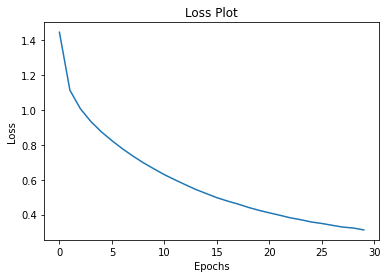

In [ ]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) 
    img_tensor_val = image_features_extract_model(temp_input) 
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) 

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) 
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() 
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [ ]:
def plot_attention_map (caption, weights, image) :

  fig = plt.figure(figsize = (20, 20))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(cap_len) :
    weights_img = np.reshape(weights[cap], (8,8))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap], fontsize = 14, color = 'red')

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [ ]:
image_test = path_test.copy()
cap_test_data = caption_test.copy()

Real Caption: <start> child is squirted with water while older people sit and watch <end>
Prediction Caption: group of children sit in or hug and make gray pool <end>


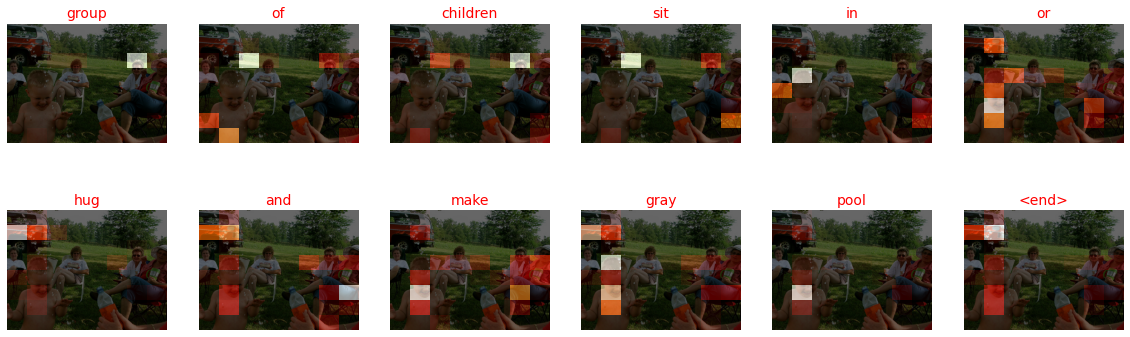

In [ ]:
# captions on the validation set
rid = np.random.randint(0, len(image_test))
test_image = image_test[rid]
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
result, attention_plot, pred_test = evaluate(test_image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention_map(result, attention_plot, test_image)